# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
#medical = pd.read_csv('data/insurance2.csv')
medical = pd.read_csv('insurance2.csv')

In [3]:
medical.shape

(1338, 8)

In [4]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

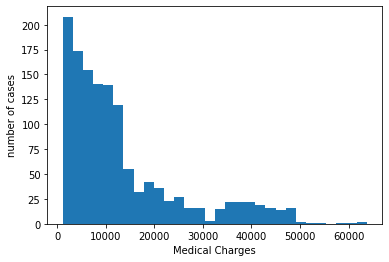

In [6]:
_ = plt.hist(medical.charges, bins=30)
_ = plt.xlabel('Medical Charges')
_ = plt.ylabel('number of cases')
_ = plt.title('Distribution of charges')

In [22]:
charge=np.array(medical.charges)
print('Mean charge = ', np.mean(charge), 'Std charge = ', np.std(charge, ddof=1))

print('The statistics demnonstrate that the mean is influenced by fewer high charges.')
print('Median charge = ', np.median(charge))

Mean charge =  13270.422265141257 Std charge =  12110.011236694001
The statistics demnonstrate that the mean is influenced by fewer high charges.
Median charge =  9382.033


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ Assuming the sample of charges was selected at random, the probability of charge fallen below 12000 should be estimated. We can estimate the P-value of obtaining 12000 charge from the sample data.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ One-sided interval should be used.

In [30]:
z_value = round(norm.ppf(.975,0,1),2)

print('z_value = ', z_value)

z_value =  1.96


In [31]:
print('confidence interval using t distribution: [',np.mean(charge)-round(z_value*np.std(charge, ddof=1)/np.sqrt(len(charge)),2), np.mean(charge)+round(z_value*np.std(charge, ddof=1)/np.sqrt(len(charge)),2),']' )

confidence interval using t distribution: [ 12621.532265141257 13919.312265141256 ]


In [55]:
# estimate the p-value of obtianing 12000 charge by trial and error
z_value_try = round(norm.ppf(.999939,0,1),2)

#print('z_value = ', z_value)
print(np.mean(charge)-round(z_value_try*np.std(charge, ddof=1)/np.sqrt(len(charge)),2))

print('the p-value of obtianing 12000 charge =',1-0.999939)
print('The probability of obtianing 12000 charge =',1-0.999939,', is very low')

11999.122265141257
the p-value of obtianing 12000 charge = 6.099999999997774e-05
The probability of obtianing 12000 charge = 6.099999999997774e-05 , is very low


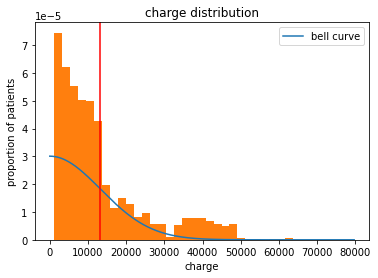

In [57]:
from scipy.stats import norm

range = np.arange(0, np.max(charge)*1.25, 1)

#_ = plt.plot(range, norm.pdf(range,np.mean(charge),np.std(charge)), label='bell curve')
_ = plt.plot(range, norm.pdf(range,0,np.mean(charge)), label='bell curve')
_ = plt.hist(medical.charges, bins=30, density=True)

_ = plt.xlabel('charge')
_ = plt.ylabel('proportion of patients')
_ = plt.title('charge distribution')
_ = plt.legend(loc="upper right")

_ = plt.axvline(np.mean(charge), color='r')

#print('Probability of observing value 12000 or less = ', np.sum(norm.pdf(range,0,1)[range<=12000])*1)

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ H_0= The insurance charged same amount to those without.
       H_1= The insurance charged different amount to those without.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [92]:
medical_ins=medical[medical.insuranceclaim==1]
charges_ins=np.array(medical_ins.charges)

medical_no_ins=medical[medical.insuranceclaim==0]
charges_no_ins=np.array(medical_no_ins.charges)

n_0=len(charges_ins)
n_1=len(charges_no_ins)

s_0=np.std(charges_ins, ddof=1)
s_1=np.std(charges_no_ins, ddof=1)

sp=np.sqrt(((n_0-1)*(s_0**2)+(n_1-1)*(s_1**2))/(n_0+n_1-2))

x_0=np.mean(charges_ins)
x_1=np.mean(charges_no_ins)

t=(x_0-x_1)/(sp*np.sqrt((1/n_0)+(1/n_1)))

#alternative formula
from scipy.stats import sem

# function for calculating the t-test for two independent samples
def independent_ttest(data1, data2, alpha):
    # calculate means
    mean1, mean2 = np.mean(data1), np.mean(data2)
    # calculate standard errors
    se1, se2 = sem(data1), sem(data2)
    # standard error on the difference between the samples
    sed = np.sqrt(se1**2.0 + se2**2.0)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed
    print(t_stat)
    # degrees of freedom
    df = len(data1) + len(data2) - 2
    # calculate the critical value
    #cv = t.ppf(1.0 - alpha, df)
    # calculate the p-value
    #p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    # return everything
    return t_stat, df#, cv, p

######

#t_stat, df, cv, p=independent_ttest(charges_ins, charges_no_ins, 0.5)
t_stat, df=independent_ttest(charges_ins, charges_no_ins, 0.5)

print(t_stat)
print(t)

13.298031957975645
13.298031957975645
11.89329903087671


In [83]:
from scipy.stats import stats

medical_ins=medical[medical.insuranceclaim==1]
charges_ins=np.array(medical_ins.charges)

medical_no_ins=medical[medical.insuranceclaim==0]
charges_no_ins=np.array(medical_no_ins.charges)

stats.ttest_ind(charges_ins,charges_no_ins, equal_var = False)

Ttest_indResult(statistic=13.298031957975649, pvalue=1.1105103216309125e-37)

In [ ]:
help(stats.ttest_ind)

In [94]:
help(stats)

Help on module scipy.stats.stats in scipy.stats:

NAME
    scipy.stats.stats

DESCRIPTION
    A collection of basic statistical functions for Python.  The function
    names appear below.
    
     Some scalar functions defined here are also available in the scipy.special
     package where they work on arbitrary sized arrays.
    
    Disclaimers:  The function list is obviously incomplete and, worse, the
    functions are not optimized.  All functions have been tested (some more
    so than others), but they are far from bulletproof.  Thus, as with any
    free software, no warranty or guarantee is expressed or implied. :-)  A
    few extra functions that don't appear in the list below can be found by
    interested treasure-hunters.  These functions don't necessarily have
    both list and array versions but were deemed useful.
    
    Central Tendency
    ----------------
    .. autosummary::
       :toctree: generated/
    
        gmean
        hmean
        mode
    
    Moment

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ z-test result can be obtained from zscore. This functionality is suggested to be used when population paramerters are known or sample size is greater than 30/

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test